In [ ]:
'''
Image subtraction requires both the template(non-defective) and test(defective) images 
to be of the exact same dimensions and orientation.

The whole defect detection process is performed on one sample test image of the defect
missing hole for PCB 01. Similar can be done for the other defects.
The steps performed are common for both template and test images, and then the test image is
subtracted from template image to get the resultant image which shows the defects. 
Contour detection is also done to calculate the number of defects in an image.
'''

In [ ]:
# Command to install OpenCV library :
# pip install opencv-python

In [1]:
import cv2 
import matplotlib.pyplot as plt
import os

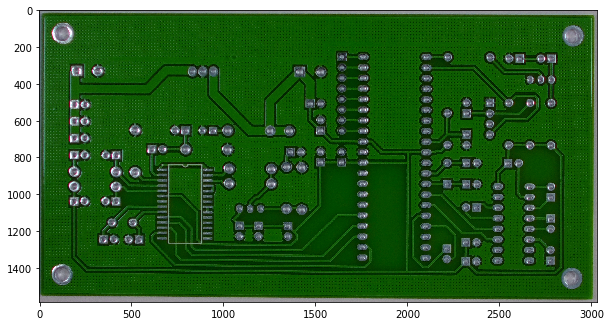

In [10]:
# read template PCB 01 image
rgb_template_img = cv2.imread('Bare-PCB-dataset//Template-PCB-images//01.jpg')  

# display original template PCB image
plt.figure(figsize=(10,6))
plt.imshow(rgb_template_img, cmap="gray")

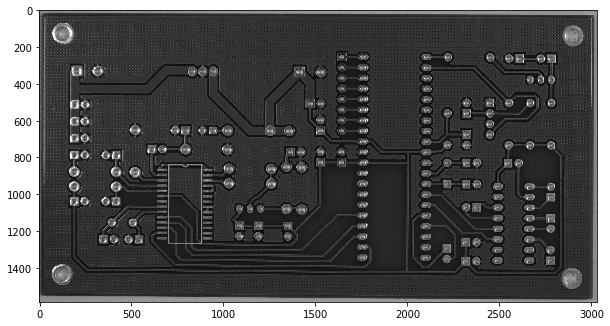

In [11]:
# read template PCB 01 image as grayscale image
template_img = cv2.imread('Bare-PCB-dataset//Template-PCB-images//01.jpg', 0)  
# the 2nd parameter is flag, makes image grayscale for value 0 or 2

# display the grayscale template PCB image
plt.figure(figsize=(10,6))
plt.imshow(template_img, cmap="gray")

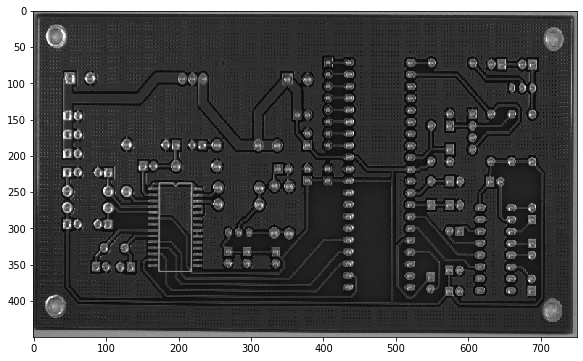

In [12]:
# resize template image of PCB
template_img_resize = cv2.resize(template_img, (750, 450))

# display the grayscale resized template PCB image
plt.figure(figsize=(10,6))
plt.imshow(template_img_resize, cmap="gray")

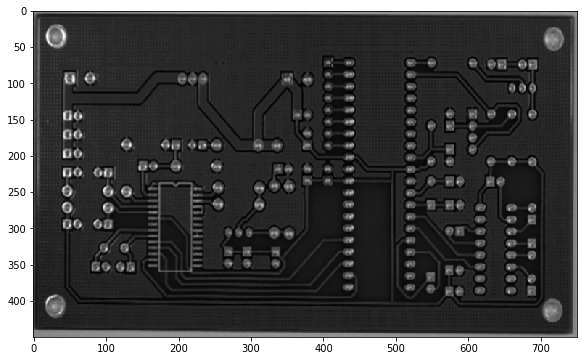

In [13]:
# Gaussian blur to blur the image before thresholding
blur_template_img = cv2.GaussianBlur(template_img_resize, (3,3),0)

# display the blurred image
plt.figure(figsize=(10,6))
plt.imshow(blur_template_img, cmap="gray")

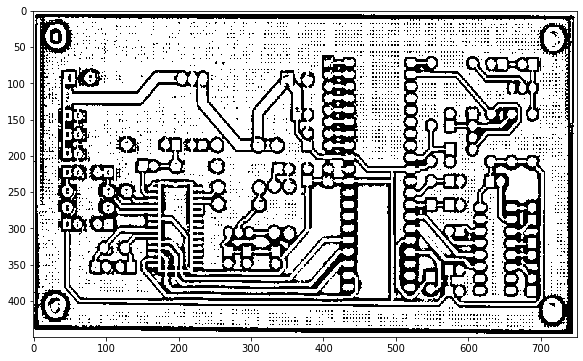

In [14]:
# Adaptive thresholding(mean)
# Thresholding is used to turn a grayscale image into a binary image based on a 
# specific threshold value
template_adap_thresh = cv2.adaptiveThreshold(blur_template_img, 255, 
                                         cv2. ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 15, 5)

# display the thresholded image
plt.figure(figsize=(10,6))
plt.imshow(template_adap_thresh, cmap="gray")

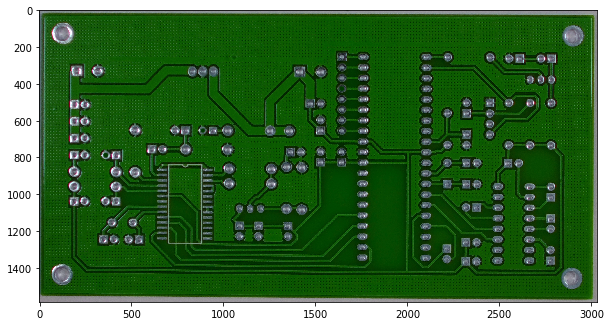

In [15]:
# read test image of PCB 01
rgb_test_img = cv2.imread('Bare-PCB-dataset//Defective-PCB-images//Missing_hole//Missing_hole_01//01_missing_hole_10.jpg')  

# display original test PCB image
plt.figure(figsize=(10,6))
plt.imshow(rgb_test_img, cmap="gray")

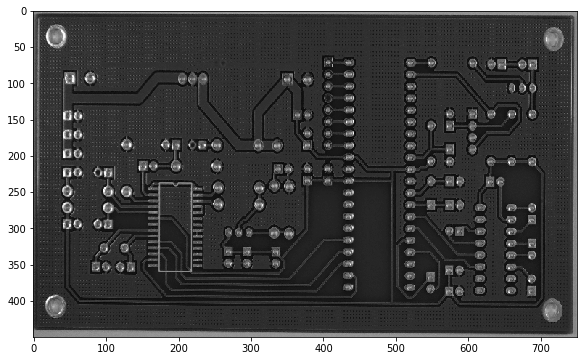

In [16]:
# read grayscale test PCB image
test_img = cv2.imread('Bare-PCB-dataset//Defective-PCB-images//Missing_hole//Missing_hole_01//01_missing_hole_10.jpg', 0)

# resize test image of PCB
test_img_resize = cv2.resize(test_img, (750, 450))

# display the grayscale resized test PCB image
plt.figure(figsize=(10,6))
plt.imshow(test_img_resize, cmap="gray")

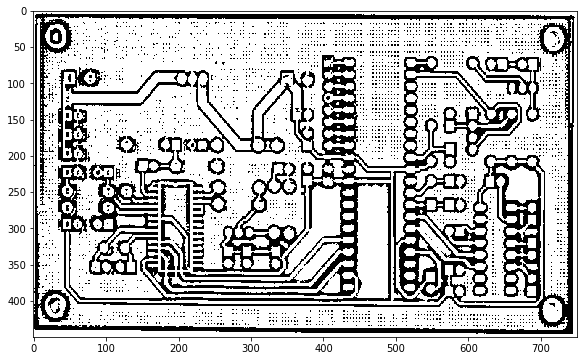

In [17]:
# Gaussian blur to blur the image before thresholding
blur_test_img = cv2.GaussianBlur(test_img_resize, (3,3),0)

# Adaptive thresholding(mean) on test image
test_adap_thresh = cv2.adaptiveThreshold(blur_test_img, 255, 
                                         cv2. ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 15, 5)

# display the thresholded test image
plt.figure(figsize=(10,6))
plt.imshow(test_adap_thresh, cmap="gray")

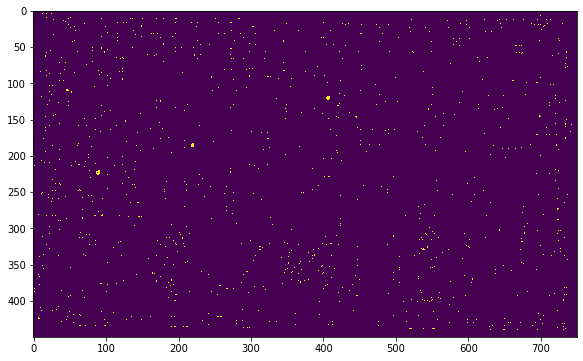

In [18]:
# Image subtraction (template - test)

sub_img= cv2.subtract(template_adap_thresh, test_adap_thresh)

# display resultant image after subtraction
plt.figure(figsize=(10,6))
plt.imshow(sub_img)

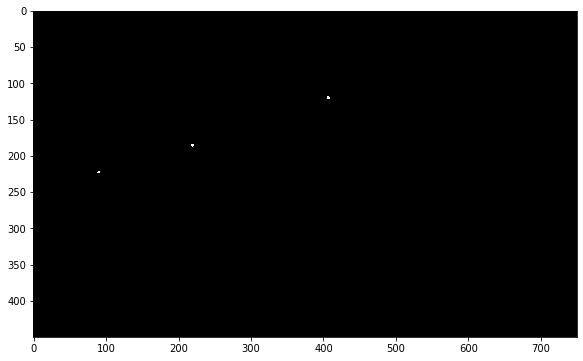

In [23]:
# Median blur to eliminate background noise
final_img = cv2.medianBlur(sub_img, 5)

# display final binary image result 
# to show defects in the image
plt.figure(figsize=(10,6))
plt.imshow(final_img, cmap="gray")

In [22]:
# contour detection to get the count of defects 
cnts = cv2.findContours(final_img, cv2.RETR_LIST,
                        cv2.CHAIN_APPROX_SIMPLE)[-2]          
blobs = []
for cnt in cnts:
    if 0<cv2.contourArea(cnt)<300:
        blobs.append(cnt)  

print("Number of defects in image:")
print(len(blobs))

Number of defects in image:
3
